# <p style="text-align: center;">Bike Sharing Assignment</p>

## Problem Statemment
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. 

Boom Bike is provides users such a bike sharing system. Due to recent covid lockdown it suffered dip in its revenue.So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.  Therefore BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits. To achive this goal they want to determine the factors which controls the demand of bike sharing from the historical data .

## Business Goal
 
To determine the variable which controls the demand for the bike sharing . These variable can be used  to create  machine learning model which can help them to strtegize their business plan providing advance predictions such as

1. When to provide more bikes for sharing
2. When to reduce the number of bikes avaiable to reduce maintenance cost




 




## Step 1: Understand Data, Clean Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

### Step 1.1: Read and Check Data

In [2]:
bikes=pd.read_csv("day.csv")
print(bikes.shape)

(730, 16)


In [3]:
pd.set_option('display.max_columns',16)
bikes.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
bikes.duplicated().sum()

0

- There is no rows will null values
- No rows are duplicated

### Step 1.2 Drop unnecessary columns
- instant is just index. it wont affect the outcome. So it can be dropped
- dteday is already synthesized into yr,mnth,weekday features. So this too can be dropped
- There 3 depndent variables, cnt, casual, and registered. However cnt is sum of regsitered and casual variable. Also the business objective to see how features after affecting overall demand whihc can be explained by cnt. So we can drop casual and registered

In [6]:
bikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB



- All  columns are in int64 or float64 format

In [8]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Step 1.3 Identify numerical and Categorical Variables

In [9]:
bikes.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [10]:
cat_vars=['season','yr','mnth','holiday','weekday','workingday','weathersit']
num_vars=['temp','atemp','hum','windspeed','cnt']


- Though the values of season,mnth,holiday,weekday,workingday ,weathersit are numerical,, they are infact categorical variables considering the number of unque values 
- To make data more readable changing the values of categorical variables as per data dictionary shared

In [11]:
bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes['weathersit'] = bikes['weathersit'].map({1: "clear-sky", 2: "misty", 3: "light", 4: "heavy"})
bikes['mnth'] = bikes['mnth'].map({1: "jan", 2: "feb", 3: "mar", 4: "apr", 5: "may", 6: "june", 7: "july", 8: "aug", 9: "sept", 10 : "oct", 11: "nov", 12: 'dec'})
bikes['weekday'] = bikes['weekday'].map({0: "sun", 1: "mon", 2: "tue", 3: "wed", 4: "thu", 5: "fri", 6: "sat"})
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear-sky,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear-sky,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear-sky,9.305237,11.46350,43.6957,12.522300,1600


### Step 1.4 Data Cleaning¶

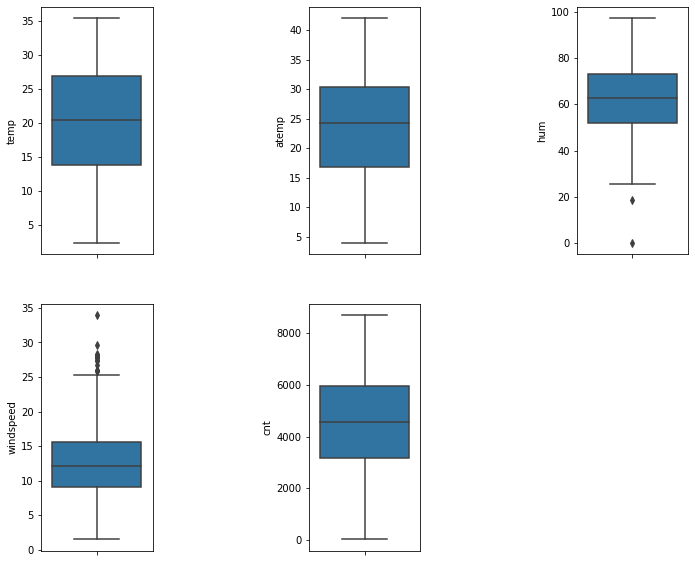

In [12]:
plt.figure(figsize=(14,10))
i=1
for var in num_vars:
    plt.subplot(2,6,i)
    sns.boxplot(y=bikes[var])
    i=i+2
plt.show()

In [13]:
windspeed_q99=bikes['windspeed'].quantile(0.99)
print(windspeed_q99)
                                  

27.380947620000004


In [14]:
bikes=bikes[bikes['windspeed'] < windspeed_q99]

<AxesSubplot:>

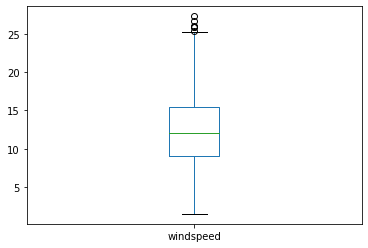

In [15]:
bikes.windspeed.plot.box()

In [16]:
bikes.shape

(722, 12)

In [17]:
hum_q01=bikes.hum.quantile(0.01)
print(hum_q01)

31.420500999999998


In [18]:
bikes=bikes[bikes.hum > hum_q01]


<AxesSubplot:>

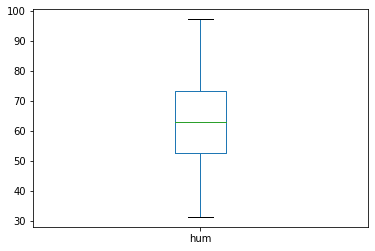

In [19]:
bikes.hum.plot.box()

In [20]:
bikes.shape

(714, 12)


- Humidity and Windspeed have some outliers .  They are removed
- Assumption: 1 percent quartile is chosen as threshold since there are only 730 rows. 

#### Check categorical variables for outliers 

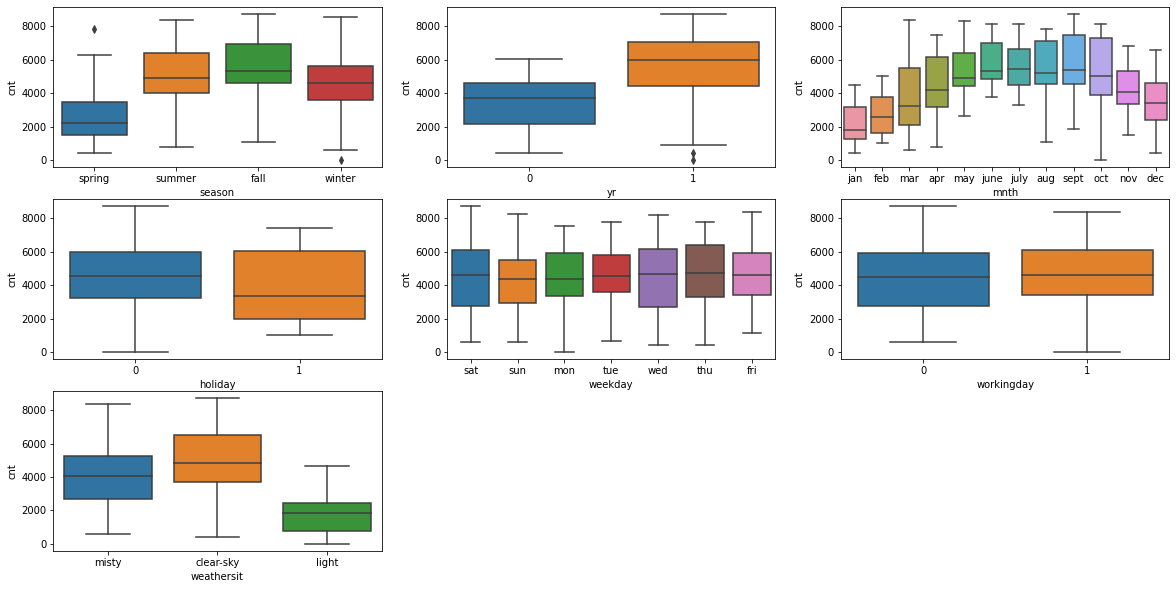

In [21]:
plt.figure(figsize=(20,10))
i=1
for var in cat_vars:
    plt.subplot(3,3,i)
    sns.boxplot(x=bikes[var],y=bikes['cnt'])
    i=i+1
plt.show()

- Theare are hardly any outliers in categorical variables with respect to cnt.
- So keeping all the remaining rows intact

## Step 2. EDA

<Figure size 1440x1440 with 0 Axes>

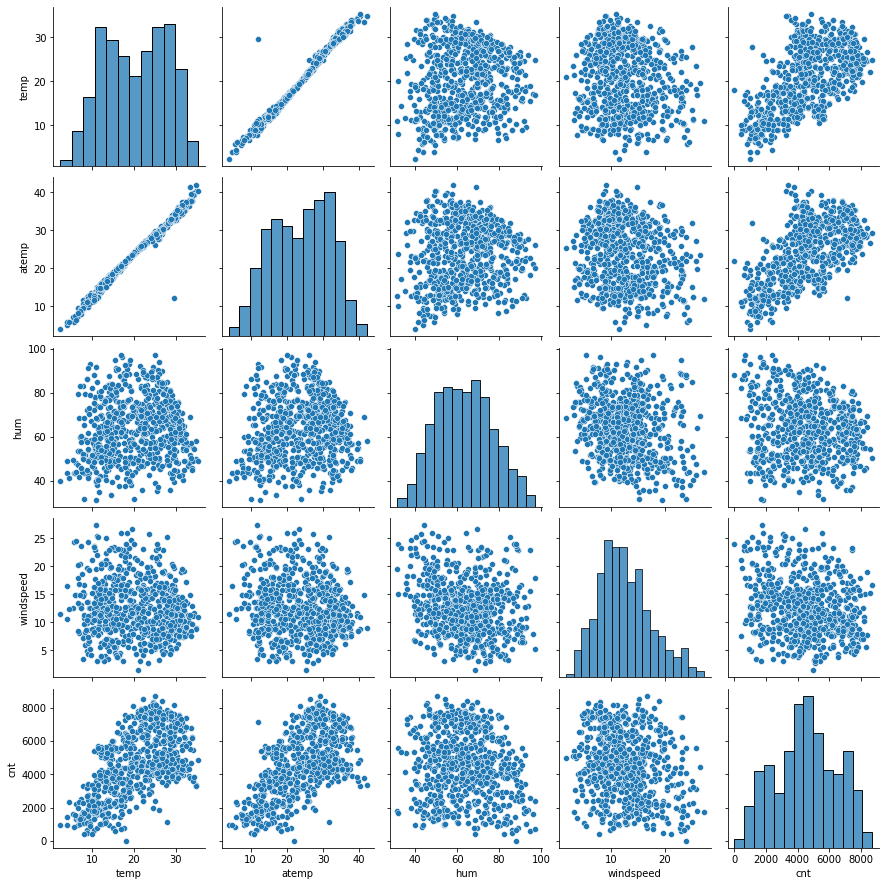

In [22]:
plt.figure(figsize=(20,20))
sns.pairplot(data=bikes,x_vars=bikes[num_vars],y_vars=bikes[num_vars])
plt.show()

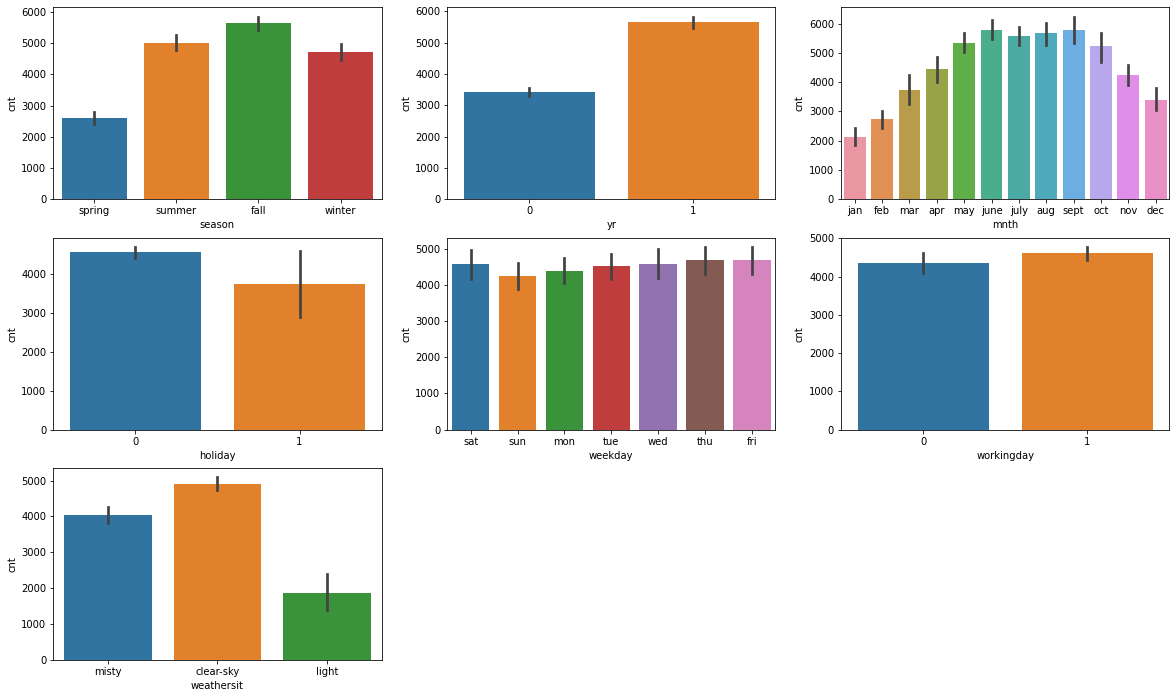

In [23]:
plt.figure(figsize=(20,12))
i=1
for var in cat_vars:
    plt.subplot(3,3,i)
    sns.barplot(x=bikes[var],y=bikes['cnt'])
    i=i+1
plt.show()

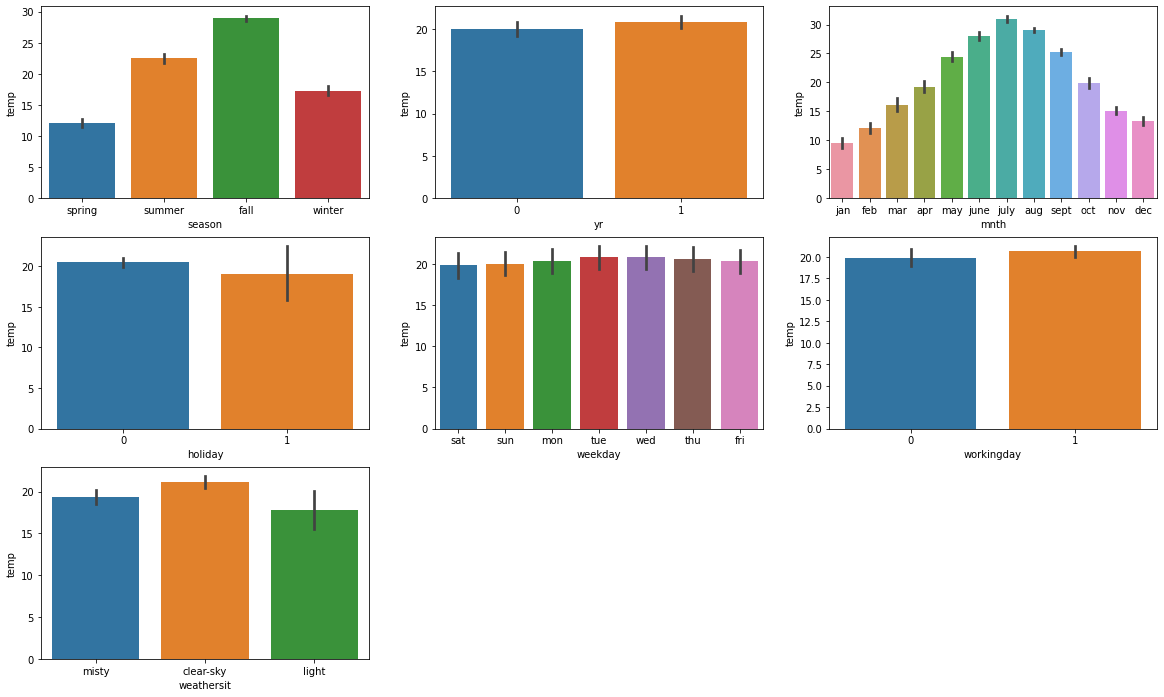

In [24]:
plt.figure(figsize=(20,12))
i=1
for var in cat_vars:
    plt.subplot(3,3,i)
    sns.barplot(x=bikes[var],y=bikes.temp)
    i=i+1
plt.show()

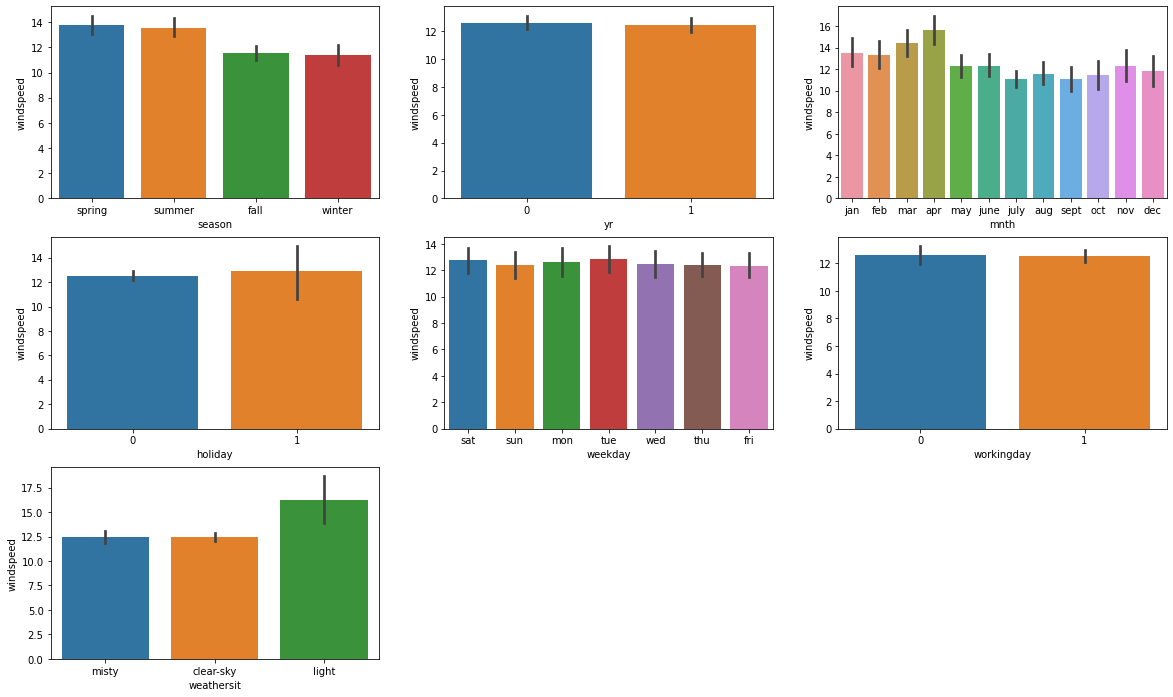

In [25]:
plt.figure(figsize=(20,12))
i=1
for var in cat_vars:
    plt.subplot(3,3,i)
    sns.barplot(x=bikes[var],y=bikes.windspeed)
    i=i+1
plt.show()

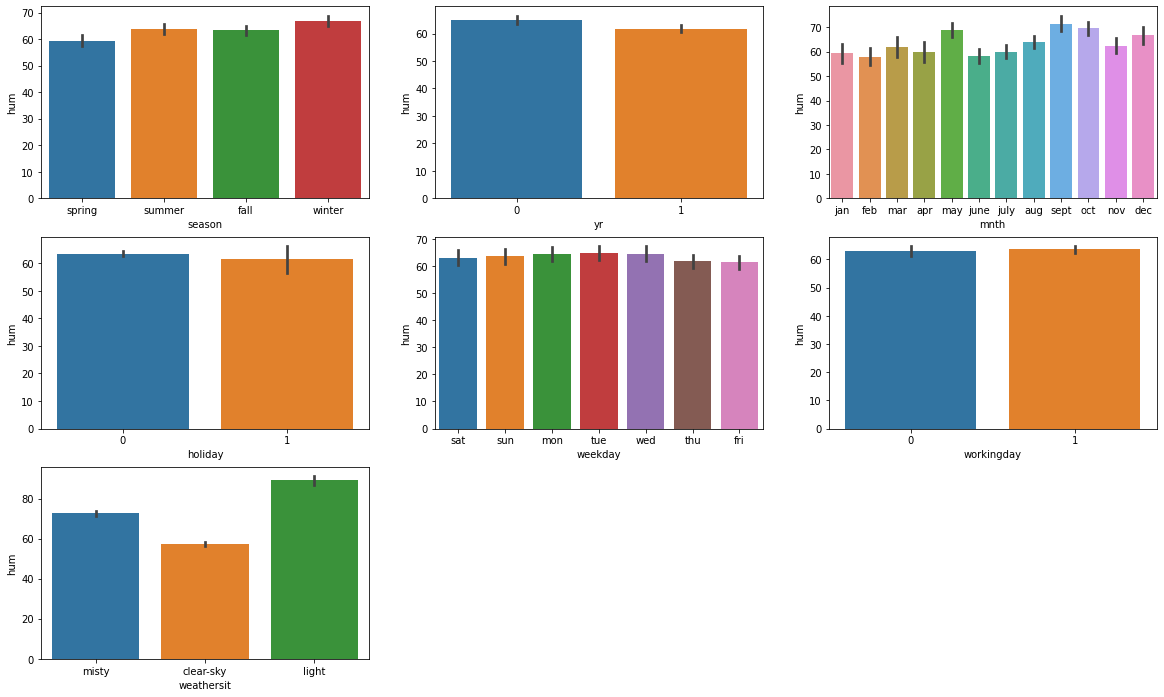

In [26]:
plt.figure(figsize=(20,12))
i=1
for var in cat_vars:
    plt.subplot(3,3,i)
    sns.barplot(x=bikes[var],y=bikes.hum)
    i=i+1
plt.show()

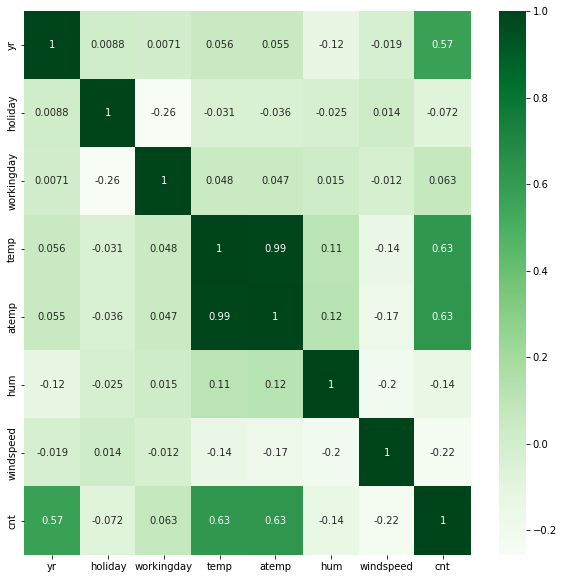

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(bikes.corr(),cmap='Greens',annot=True)
plt.show()

### Obesrvation from EDA
- cnt increase linearly with 'temp' . Also there more data points in the higher temp zone. This shows there is demand for bike sharing daay temperature is towards higher range
- Similar observation is there for 'atemp'
- temp and atemp is highly related (0.99)
- There is no clear relation between 'hum' an 'cnt'. But thre are more data points for the days when humidiy is more.
- There is no clear relation between 'windspeed' an 'cnt'. But there are more data points for the days when windspeed is less.
- Bike sharing demand increasing year on year
- Weather situation greatly impact bike demand. When the weather situation clear-sky the demand is more . When the weather sitation is light(Light rain) demand drops.
- There is drop in bike dmand if there is a holiday
- There is more demand for bike from month May to October. 
- There is more demand for bike in Fall season . There is less demand for bike in Spring season 
- The temperature is highest in the month of July.The humidity is in lower range and so as the windspeed. This factors into high bike demand aswell
- humidity increases when the situation in light rainiy or snowy. similarly windspeed in high when it is rainy or snowly day. This results in lower bike demand
- temprature, humidity and windspeed more or less same range across years. But since bike demand is more in 2019 than 2018, shows that the service is getting popularity

## Step 3. Model Buidling


### Step 3.1 Dropping columns based on EDA

- From EDA it is clear temp and atemp is highly corrleated. So dropping atemp

In [28]:
bikes.drop('atemp',axis=1,inplace=True)

- instant ,dteday, dropped as they are not valid variables for analysis
- casual and registered columns are not independent variables. also they are related directly to 'cnt' variables cnt=casual+registered. So they too are dropped

In [29]:
cat_vars

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [30]:
num_vars=['temp',  'hum', 'windspeed']

In [31]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Step 3.2 Create Dummy variable for categorical varaibles

In [32]:
bikes[cat_vars].nunique()>2

season         True
yr            False
mnth           True
holiday       False
weekday        True
workingday    False
weathersit     True
dtype: bool

In [33]:
cat_vars_cat_gt_2=['season','mnth','weekday','weathersit']

In [34]:
bikes_with_dummies=bikes
for cat in cat_vars_cat_gt_2:
    dummies=pd.get_dummies(bikes[cat],prefix=cat,drop_first=True)
    bikes_with_dummies=pd.concat([bikes_with_dummies,dummies],axis=1)
pd.set_option('display.max_columns', 50)
bikes_with_dummies.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light,weathersit_misty
0,spring,0,jan,0,sat,0,misty,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,misty,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,clear-sky,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear-sky,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,clear-sky,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:

bikes_data=bikes_with_dummies.drop(cat_vars_cat_gt_2,axis=1)
bikes_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light,weathersit_misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
bikes_data.shape

(714, 29)

- Dummy variables created and corresponding categorical variables dropped

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Step 3.3 Split train and test data (use ration 70:30)

In [38]:
bikes_train,bikes_test=train_test_split(bikes_data,train_size=0.7,test_size = 0.30, random_state=100)

In [39]:
print(bikes_train.shape)
print(bikes_test.shape)

(499, 29)
(215, 29)


### Step 3.4 Scaling and Normalizing data, Preparing Feature and target data for training

In [40]:
bikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light,weathersit_misty
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,0.511022,0.026052,0.691383,20.396985,63.920701,12.531467,4559.675351,0.232465,0.242485,0.246493,0.090180,0.088176,0.066132,0.088176,0.084168,0.078156,0.084168,0.086172,0.092184,0.074148,0.092184,0.146293,0.148297,0.134269,0.120240,0.144289,0.146293,0.028056,0.352705
std,0.500380,0.159450,0.462386,7.552354,13.579892,4.996658,1985.647759,0.422828,0.429016,0.431401,0.286727,0.283836,0.248763,0.283836,0.277919,0.268687,0.277919,0.280900,0.289576,0.262275,0.289576,0.353754,0.355750,0.341283,0.325569,0.351735,0.353754,0.165299,0.478291
min,0.000000,0.000000,0.000000,2.424346,31.750000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.974173,53.625000,8.854486,3176.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.642598,63.666700,11.792000,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.991673,73.791650,15.479646,6105.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,27.292182,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
num_vars = ['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()

bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])
bikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light,weathersit_misty
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,0.511022,0.026052,0.691383,0.546214,0.492723,0.427700,0.522052,0.232465,0.242485,0.246493,0.090180,0.088176,0.066132,0.088176,0.084168,0.078156,0.084168,0.086172,0.092184,0.074148,0.092184,0.146293,0.148297,0.134269,0.120240,0.144289,0.146293,0.028056,0.352705
std,0.500380,0.159450,0.462386,0.229527,0.207988,0.193729,0.228445,0.422828,0.429016,0.431401,0.286727,0.283836,0.248763,0.283836,0.277919,0.268687,0.277919,0.280900,0.289576,0.262275,0.289576,0.353754,0.355750,0.341283,0.325569,0.351735,0.353754,0.165299,0.478291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.351016,0.335035,0.285137,0.362920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.553679,0.488832,0.399030,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746636,0.643905,0.542007,0.699896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
bikes_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,499.000000,499.000000,499.000000,499.000000
mean,0.546214,0.492723,0.427700,0.522052
std,0.229527,0.207988,0.193729,0.228445
min,0.000000,0.000000,0.000000,0.000000
25%,0.351016,0.335035,0.285137,0.362920
50%,0.553679,0.488832,0.399030,0.524275
75%,0.746636,0.643905,0.542007,0.699896
max,1.000000,1.000000,1.000000,1.000000


In [43]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

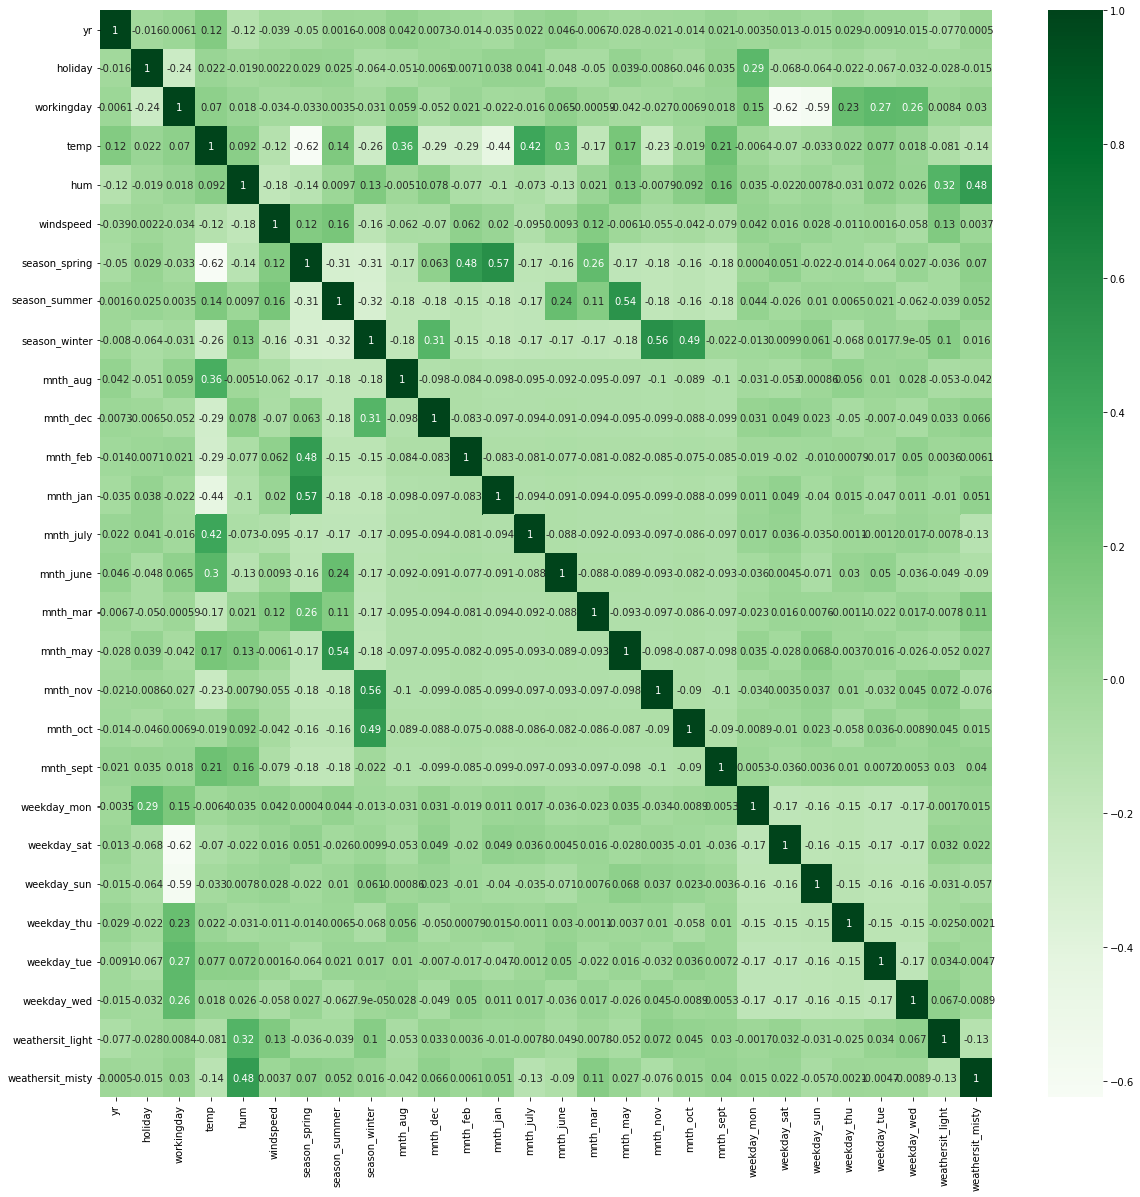

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),cmap='Greens',annot=True)
plt.show()

### Step 3.5 Build  model with all features to analyze

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X_train): 
    vif=pd.DataFrame()
    vif['Features']=X_train.columns
    vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values('VIF',ascending=False)
    print(vif)

In [46]:
def build_and_check_model(x_train):   
    x_train_sm=sm.add_constant(x_train)
    model=sm.OLS(y_train,x_train_sm).fit()
    print(model.summary())
    calculate_vif(x_train)
    return model

In [47]:
model_all=build_and_check_model(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     94.36
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          4.48e-171
Time:                        14:58:03   Log-Likelihood:                 492.71
No. Observations:                 499   AIC:                            -929.4
Df Residuals:                     471   BIC:                            -811.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2272      0.036  

### Observation
- 16 Variables are having p value > 0.05
- 14 varaibles are having VIF > 5

### Step 3.6 Create base model with sklearn RFE method
- Dropping 7 less important feature
- Prioritize 22 Variables 

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,22)
rfe=rfe.fit(X_train,y_train)
t=list(zip(X_train.columns,rfe.support_,rfe.ranking_))
list(t)


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 5),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 4),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 2),
 ('mnth_sept', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 7),
 ('weekday_tue', False, 3),
 ('weekday_wed', False, 6),
 ('weathersit_light', True, 1),
 ('weathersit_misty', True, 1)]

In [49]:
vars=[]
[vars.append(t[i][0]) if t[i][1]==True else 'x' for i in range(len(t))]
X_train_rfe=X_train[vars]
model_rfe=build_and_check_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     122.6
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          4.99e-177
Time:                        14:58:04   Log-Likelihood:                 492.23
No. Observations:                 499   AIC:                            -940.5
Df Residuals:                     477   BIC:                            -847.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2289      0.031  

- After dropping 7 variables r square values still almost same. This is good base to start pruning the model further

- mnth_aug has p-value .560 which > 0.05. So dropping this

In [50]:
X_train_1=X_train_rfe.drop('mnth_aug',axis=1)
model_1=build_and_check_model(X_train_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     128.9
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          5.14e-178
Time:                        14:58:04   Log-Likelihood:                 492.05
No. Observations:                 499   AIC:                            -942.1
Df Residuals:                     478   BIC:                            -853.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2350      0.029  

- holiday has p-value .301 which > 0.05. So dropping this

In [51]:
X_train_2=X_train_1.drop('holiday',axis=1)
model_2=build_and_check_model(X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     128.9
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          5.14e-178
Time:                        14:58:04   Log-Likelihood:                 492.05
No. Observations:                 499   AIC:                            -942.1
Df Residuals:                     478   BIC:                            -853.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2594      0.046  

- weekday_sun has p-value .76 which > 0.05. So dropping this

In [52]:
X_train_3=X_train_2.drop('weekday_sun',axis=1)
model_3=build_and_check_model(X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          4.59e-179
Time:                        14:58:05   Log-Likelihood:                 492.00
No. Observations:                 499   AIC:                            -944.0
Df Residuals:                     479   BIC:                            -859.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2683      0.037  

- season_summer has p-value .259 which > 0.05. So dropping this

In [53]:
X_train_4=X_train_3.drop('season_summer',axis=1)
model_4=build_and_check_model(X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     143.3
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          7.12e-180
Time:                        14:58:05   Log-Likelihood:                 491.33
No. Observations:                 499   AIC:                            -944.7
Df Residuals:                     480   BIC:                            -864.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2903      0.031  

- mnth_jan has p-value .560 which > 0.191. So dropping this

In [54]:
X_train_5=X_train_4.drop('mnth_jan',axis=1)
model_5=build_and_check_model(X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     151.4
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          1.34e-180
Time:                        14:58:05   Log-Likelihood:                 490.44
No. Observations:                 499   AIC:                            -944.9
Df Residuals:                     481   BIC:                            -869.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2800      0.030  

- no variable p-value > 0.05
- temp has highes VIF. Dropping temp

In [55]:
X_train_6=X_train_5.drop('temp',axis=1)
model_6=build_and_check_model(X_train_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     110.1
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          2.10e-149
Time:                        14:58:05   Log-Likelihood:                 412.92
No. Observations:                 499   AIC:                            -791.8
Df Residuals:                     482   BIC:                            -720.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5466      0.026  

- Dropping temp has reduced r square drastically. So keeping temp and droppin hum whihc has next highest VIF

In [56]:
X_train_6=X_train_5.drop('hum',axis=1)
model_6=build_and_check_model(X_train_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     150.3
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          1.36e-175
Time:                        14:58:05   Log-Likelihood:                 475.77
No. Observations:                 499   AIC:                            -917.5
Df Residuals:                     482   BIC:                            -845.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2346      0.030  

- mnth_may has p-value .130 which > 0.05. So dropping this

In [57]:
X_train_7=X_train_6.drop('mnth_may',axis=1)
model_7=build_and_check_model(X_train_7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     159.7
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          3.30e-176
Time:                        14:58:05   Log-Likelihood:                 474.59
No. Observations:                 499   AIC:                            -917.2
Df Residuals:                     483   BIC:                            -849.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2425      0.029  

- windspeed has high VIF >5. Dropping this

In [58]:
X_train_8=X_train_7.drop('windspeed',axis=1)
model_8=build_and_check_model(X_train_8)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          4.74e-172
Time:                        14:58:06   Log-Likelihood:                 461.98
No. Observations:                 499   AIC:                            -894.0
Df Residuals:                     484   BIC:                            -830.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1757      0.027  

- p-value of mnth_mar is very close to 0.05.dropping this

In [59]:
X_train_9=X_train_8.drop('mnth_mar',axis=1)
model_9=build_and_check_model(X_train_9)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     172.4
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          2.61e-172
Time:                        14:58:06   Log-Likelihood:                 459.91
No. Observations:                 499   AIC:                            -891.8
Df Residuals:                     485   BIC:                            -832.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1817      0.027  

- Weekday mon has relative high p value >0.005 .dropping this

In [60]:
X_train_10=X_train_9.drop('weekday_mon',axis=1)
model_10=build_and_check_model(X_train_10)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     184.4
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          3.50e-172
Time:                        14:58:06   Log-Likelihood:                 456.89
No. Observations:                 499   AIC:                            -887.8
Df Residuals:                     486   BIC:                            -833.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1760      0.027  

In [61]:
X_train_11=X_train_10.drop('mnth_july',axis=1)
model_11=build_and_check_model(X_train_11)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     197.7
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          1.05e-171
Time:                        14:58:06   Log-Likelihood:                 453.00
No. Observations:                 499   AIC:                            -882.0
Df Residuals:                     487   BIC:                            -831.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1911      0.026  

 
- Model 11 seems to be better model with VIF < 5 and pvalue <0.05 for each independent variable 

## Step 4. Residual Analysis

In [62]:
y_train_predict=model_11.predict(sm.add_constant(X_train_11))
residual=y_train-y_train_predict

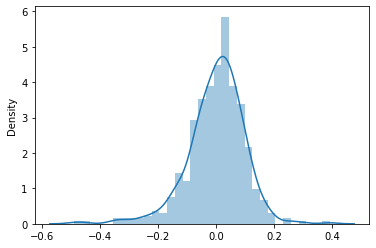

In [63]:
sns.distplot(residual)
plt.show()

- Histogram shows Error residual mean is centered arround zero

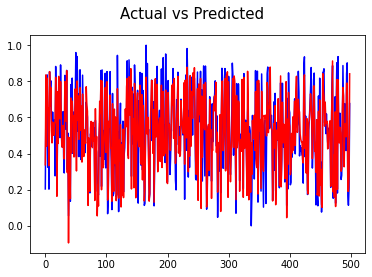

In [64]:
c = [i for i in range(0, len(X_train_6), 1)]
plt.plot(c, y_train, color="blue")
plt.plot(c, y_train_predict, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.show()

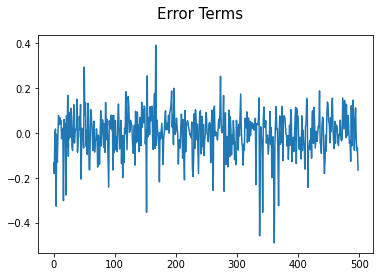

In [65]:
c = [i for i in range(0, len(X_train_6), 1)]
plt.plot(c, residual)
plt.suptitle('Error Terms', fontsize = 15)
plt.show()

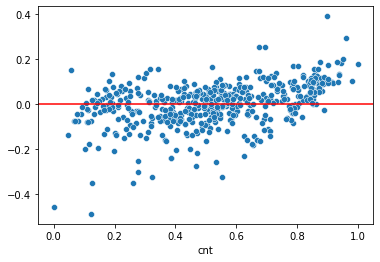

In [66]:
sns.scatterplot(y_train,residual)
plt.axhline(color='r')
plt.show()

- Above plot shows the residuals are having near similar variance. Thus proving homoscedasticity

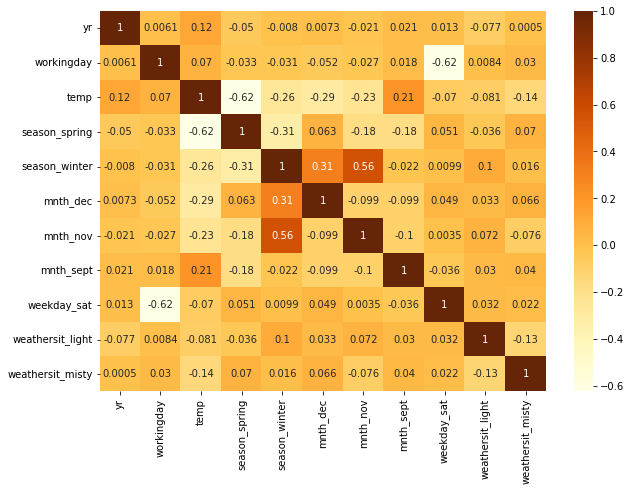

In [67]:

plt.figure(figsize = (10,7))
sns.heatmap(X_train_11.corr(), annot = True, cmap = "YlOrBr")
plt.show()

- Above figure shows that the indepndent variable are unrelated to each other. Thus proving absense of multi coliliearity. This is al proven byt th VIF factord of the variables whihc are less than 5

## Step 5. Model Evaluation

#### Step 5.1: Scale the test data

In [68]:
bikes_test[num_vars]=scaler.transform(bikes_test[num_vars])
bikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light,weathersit_misty
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.469767,0.037209,0.669767,0.548600,0.466088,0.429436,0.511077,0.255814,0.265116,0.251163,0.079070,0.083721,0.088372,0.074419,0.093023,0.093023,0.065116,0.088372,0.065116,0.111628,0.065116,0.139535,0.130233,0.162791,0.186047,0.139535,0.134884,0.027907,0.320930
std,0.500250,0.189716,0.471394,0.226448,0.207202,0.186841,0.208710,0.437336,0.442425,0.434694,0.270477,0.277615,0.284498,0.263063,0.291143,0.291143,0.247307,0.284498,0.247307,0.315643,0.247307,0.347312,0.337345,0.370036,0.390052,0.347312,0.342397,0.165091,0.467923
min,0.000000,0.000000,0.000000,0.046591,-0.004828,0.051727,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.349977,0.290132,0.297244,0.371721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.564921,0.464581,0.416780,0.516452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743002,0.620363,0.539561,0.654798,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.003190,0.924048,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
model=model_11
model_columns=X_train_11.columns

In [70]:
model_columns

Index(['yr', 'workingday', 'temp', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_nov', 'mnth_sept', 'weekday_sat', 'weathersit_light',
       'weathersit_misty'],
      dtype='object')

#### Step 5.2 Filter the test data with final model columns

In [71]:
y_test=bikes_test['cnt']
X_test=bikes_test[bikes_test.columns[bikes_test.columns!='cnt']]

In [72]:
X_test_filtered=X_test[model_columns]
y_test_predict=model.predict(sm.add_constant(X_test_filtered))
print( "r2 score : ",r2_score(y_test,y_test_predict))

r2 score :  0.8444635033335637


- Model is performing fairly well on test data with r square 84.44% on test data

#### Step 5.3 Check predcited vs actual value on test data

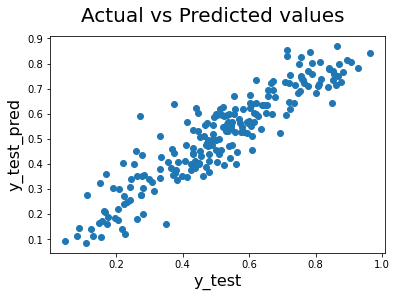

In [73]:
fig = plt.figure()
plt.scatter(y_test, y_test_predict)
fig.suptitle('Actual vs Predicted values', fontsize = 20)              
plt.xlabel('y_test', fontsize = 16)                          
plt.ylabel('y_test_pred', fontsize = 16)  
plt.show()

- Model is performing well on test data as actual and predicted values are linearly related

In [74]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_test_predict)))

0.08211976464727476


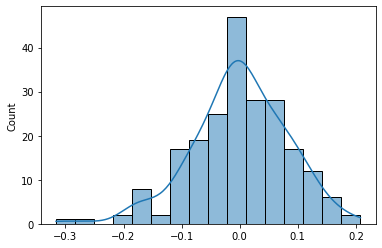

In [75]:
residual=y_test-y_test_predict
sns.histplot(residual,kde=True)
plt.show()

In [76]:
print(residual.describe())

count    215.000000
mean      -0.000259
std        0.082311
min       -0.316182
25%       -0.046384
50%        0.001732
75%        0.054764
max        0.207907
dtype: float64


- Residual is following normal distibution with mean arround 0 

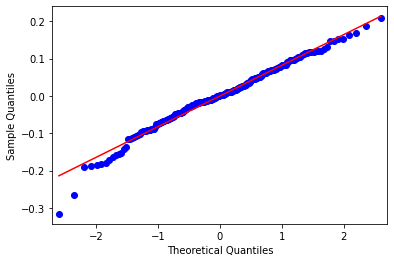

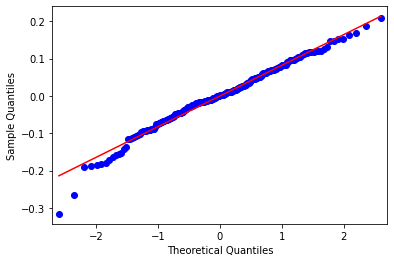

In [77]:
sm.qqplot(residual,line='s')

- qqplot showing point distubuted along y=x line . This confirms residual is following normal distribution 

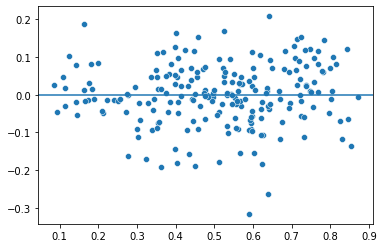

In [78]:
sns.scatterplot(y_test_predict,residual)
plt.axhline()

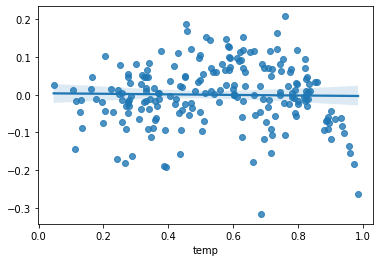

In [79]:
sns.regplot(x=X_test['temp'],y=residual)
plt.show()

## Step 6. Conclusion

### Step 6.1 Get coeffecients and prepare linear equation

In [80]:
model.params

const               0.191135
yr                  0.233240
workingday          0.054642
temp                0.390001
season_spring      -0.125091
season_winter       0.086745
mnth_dec           -0.057228
mnth_nov           -0.069732
mnth_sept           0.067322
weekday_sat         0.064649
weathersit_light   -0.292435
weathersit_misty   -0.077948
dtype: float64

### Linear equation is :

cnt=0.191135+0.233240\*yr+0.054642\*workingday+0.390001\*temp-0.125091\*season_spring+0.086745\*season_winter-0.057228\*month_dec-0.057228\*month_nov+0.067322\*month_sept+0.064649\*weekday_sat-0.292435\*weathersit_light-0.077948
*weathersit_misty

### Significant Variable determining bike demand are
- Temperature of the day
- Weather Situation of the day (Light Rain or snow and  misty)
- Current Year
- Season (Spring and winter)
- Months (September,November and December)
- Working Day